<center><img src="https://github.com/girishksahu/INSAID2021/blob/SMART_AI_Learning/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Machine Learning Advanced Project - Seattle Weather Prediction</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2021-ML-Advanced-Seattle_Weather_Prediction/blob/SMART_AI_Learning/meteomate-logo.png?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Your client for this project is Meteomate a top forecasting company.

    - They specialize in providing tailored IT solutions for weather forecasting, the energy industry, and the trading market.

    - They have extensive experience in developing market-leading forecasting systems and high-speed processing solutions for weather data.

    - They are committed to the creation of accurate weather forecasts that clients can trust, going to extra effort to make their weather API easy to consume.

**<h3>Current Scenario:</h3>**

- They have created purpose-built weather drones, allowing them to capture observations missed by traditional methods (such as satellites and weather balloons), and calculating forecasts on the fly to ensure a customer receives a forecast based on the latest observations. 

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
    - The forecasting process is based on making predictions using a large number of variables, and performing complex calculations on them.

    - This results in a massive load on the servers and also causes a slight delay in receiving the forecasts.

- The company has hired you as a data science consultant.

    - They want to make the forecasting process more efficient.


<a name = Section21></a>
### **Your Role**

- You are given datasets containing complete records of daily rainfall patterns of Seattle.

- Your task is to build a classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: **Predict whether it will rain on a specific day or not.**

- Machine Learning Task: **Classification.**

- Target Variable: **RAIN**
- Win Condition: **N/A (best possible model)**

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/INSAID2021-ML-Advanced-Seattle_Weather_Prediction/blob/SMART_AI_Learning/seattle_rain.jpg?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [4]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [5]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier 
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset contains complete records of daily rainfall patterns of Seattle.The column RAIN tells us whether rain was observed on a particular day or not.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 20440 | 6 | 958.1 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Id**   | Unique identity of each observation. |
|02| **DATE**      | The date of the observation.|
|03| **PRCP**        | The amount of precipitation, in inches.|
|04| **TMAX**          |The maximum temperature for that day, in degrees Fahrenheit.|
|05| **TMIN**      | The minimum temperature for that day, in degrees Fahrenheit |
|06| **RAIN**           | TRUE if rain was observed on that day, FALSE if it was not|

- The **Test dataset** contains complete records of daily rainfall patterns of Seattle and **RAIN** column need to be predicted if there will be Rain or not.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 5110 | 5 | 199.6 KB | 

<br>

- Load Metomate daily rainfall patterns of Seattle Data to be used for Training and Validation

In [6]:
# Id is unique ID for record and can be used as label for index
weather_master_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021-ML-Advanced-Seattle_Weather_Prediction/SMART_AI_Learning/seattle_train.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', weather_master_data.shape)

# Output first few rows
weather_master_data.head()


Shape of the Training and Validation dataset: (20440, 5)


,DATE,PRCP,TMAX,TMIN,RAIN
Id,,,,,
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


- Load Metomate daily rainfall patterns of Seattle Data Test Data to be used for Prediction

In [7]:
# Id is unique ID for record and can be used as label for index
weather_test_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021-ML-Advanced-Seattle_Weather_Prediction/SMART_AI_Learning/seattle_test.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', weather_test_data.shape)

# Output first few rows
weather_test_data.head()

Shape of the Test dataset to be used for Prediction: (5110, 4)


,DATE,PRCP,TMAX,TMIN
Id,,,,
20440,2003-12-18,0.00,54,37
20441,2003-12-19,0.14,51,38
20442,2003-12-20,0.13,48,44
20443,2003-12-21,0.01,51,38
20444,2003-12-22,0.00,53,35


In [8]:
# Check for any missing values
any(weather_master_data.isna().sum())

True

In [9]:
#check if any duplicate row
any(weather_master_data.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [10]:
#Basic statistical details for numeric variables
weather_master_data.describe()

,PRCP,TMAX,TMIN
count,20438.000000,20440.000000,20440.000000
mean,0.104860,59.301027,44.187965
std,0.235564,12.700363,8.832697
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,44.000000
75%,0.100000,69.000000,51.000000
max,5.020000,100.000000,69.000000


**Observations:**
- Total count for numeric variable **PRCP** is 20438 which confirms there are few missing values.
- **TMAX** and **TMIN** have mean and median value similar which means mostly normal distribution.

In [11]:
#Basic statistical details for categorical variables
weather_master_data.describe(include=[np.object])

,DATE,RAIN
count,20440,20438
unique,20440,2
top,1977-06-15,False
freq,1,11771


**Observations:**
- Total count for categorical variable **RAIN** is 20438 which confirms that there are few missing values. 
- **RAIN** feature has majority of category as **False** 

In [12]:
weather_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20440 entries, 0 to 20439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    20440 non-null  object 
 1   PRCP    20438 non-null  float64
 2   TMAX    20440 non-null  int64  
 3   TMIN    20440 non-null  int64  
 4   RAIN    20438 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 958.1+ KB


In [13]:
# Columns list can be handy and useful for further steps
weather_master_data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [14]:
# Check column data types and any null values
weather_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20440 entries, 0 to 20439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    20440 non-null  object 
 1   PRCP    20438 non-null  float64
 2   TMAX    20440 non-null  int64  
 3   TMIN    20440 non-null  int64  
 4   RAIN    20438 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 958.1+ KB


**Observations:**

- Total Non-Null count for column PCRCP and RAIN not same as 20440 which means there are few missing values.
- There are **3 Numerical features** with 2 column as object feature.
- **Id** column has been set as index while data load.

In [15]:
weather_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 20440 to 25550
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    5110 non-null   object 
 1   PRCP    5110 non-null   float64
 2   TMAX    5110 non-null   int64  
 3   TMIN    5110 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 199.6+ KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [16]:
profile = ProfileReport(df=weather_master_data)
profile.to_file(output_file='Seattle-Weather-Prediction Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- The report shows that there are a **total** of **5 features** out of which **3** are **numerical**, **1** is **categorical** which is Date and **Boolean** for RAIN. Id column has been set as Index.

- **RAIN** Categorical feature has partial balanced data with **11771** identified as False and **8667** as True. It has 2 data points which has missing value.

- All the features has equal number of records **20440** except RAIN and PRCP column which has 2 missing values.

- **PRCP** feature has around 57.6% as Zero values.

- For detailed information, please check **Seattle-Weather-Prediction Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are no missing values and data appears clean so far but we need to pre process few features before EDA and Model Evaluation

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [17]:
# post_profile=ProfileReport(df=weather_master_data)
# post_profile.to_file(output_file='Seattle-Weather-Prediction Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the breakdown of RAIN?**

In [18]:
weather_master_data['RAIN'].value_counts()

False    11771
True      8667
Name: RAIN, dtype: int64

In [19]:
weather_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20440 entries, 0 to 20439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    20440 non-null  object 
 1   PRCP    20438 non-null  float64
 2   TMAX    20440 non-null  int64  
 3   TMIN    20440 non-null  int64  
 4   RAIN    20438 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 958.1+ KB


<AxesSubplot:xlabel='RAIN', ylabel='count'>

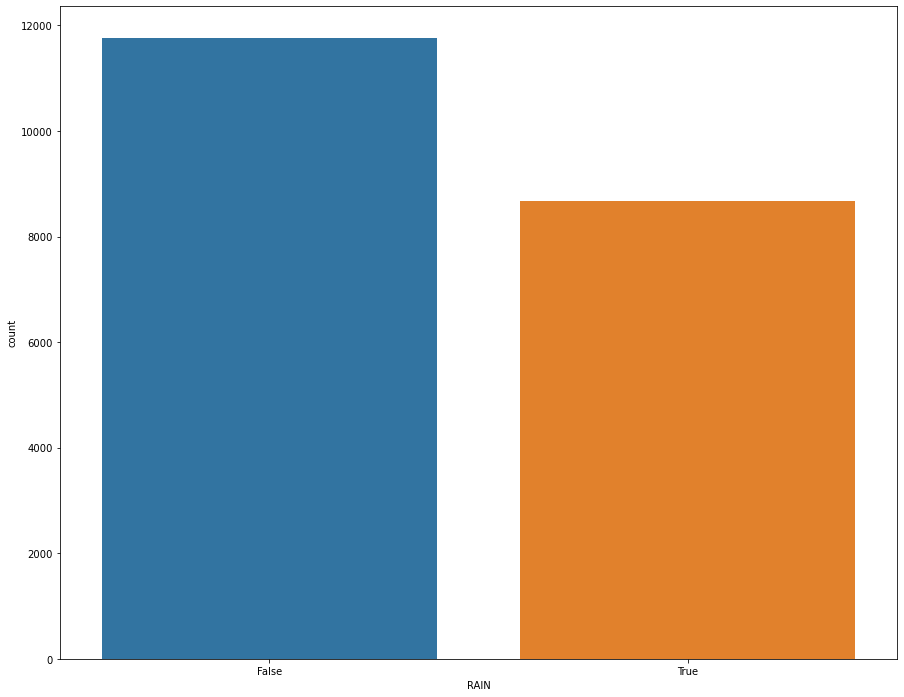

In [20]:
plt.figure(figsize=(15,12))
sns.countplot(x='RAIN',data=weather_master_data,order=weather_master_data['RAIN'].value_counts().index)

In [21]:
weather_master_data['DATE']=pd.to_datetime(weather_master_data['DATE'])

In [22]:
weather_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20440 entries, 0 to 20439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    20440 non-null  datetime64[ns]
 1   PRCP    20438 non-null  float64       
 2   TMAX    20440 non-null  int64         
 3   TMIN    20440 non-null  int64         
 4   RAIN    20438 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.6+ MB


In [23]:
groupbydate=weather_master_data.groupby(by = 'DATE', as_index = False).agg('mean')

In [24]:
groupbydate.head()

,DATE,PRCP,TMAX,TMIN
0,1948-01-01,0.47,51,42
1,1948-01-02,0.59,45,36
2,1948-01-03,0.42,45,35
3,1948-01-04,0.31,45,34
4,1948-01-05,0.17,45,32


<AxesSubplot:xlabel='DATE', ylabel='PRCP'>

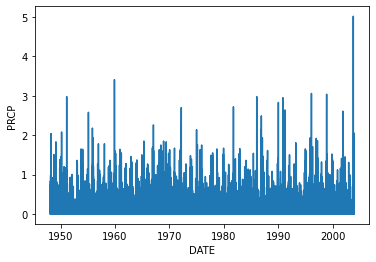

In [25]:
sns.lineplot(data=groupbydate, x="DATE", y="PRCP")

<AxesSubplot:xlabel='DATE', ylabel='TMAX'>

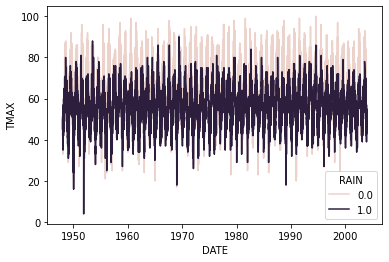

In [26]:
sns.lineplot(data=weather_master_data, x="DATE", y="TMAX", hue='RAIN')

<AxesSubplot:xlabel='DATE', ylabel='TMIN'>

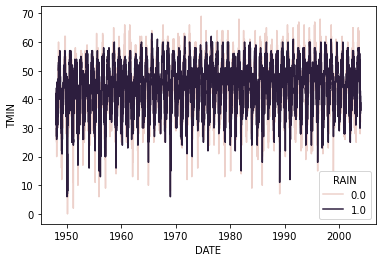

In [27]:
sns.lineplot(data=weather_master_data, x="DATE", y="TMIN", hue='RAIN')

In [28]:
rainvsprcp = weather_master_data.groupby(by='RAIN',as_index = False)['PRCP'].agg('mean').sort_values(by ='PRCP', ascending = False)

In [29]:
rainvsprcp

,RAIN,PRCP
1,True,0.247275
0,False,0.000000


<AxesSubplot:xlabel='PRCP', ylabel='RAIN'>

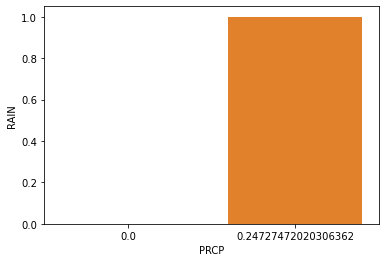

In [30]:
sns.barplot(x = 'PRCP', y ='RAIN', data = rainvsprcp)

In [31]:
rainvstmax = weather_master_data.groupby(by='RAIN',as_index = False)['TMAX'].agg('mean').sort_values(by ='TMAX', ascending = False)

In [32]:
rainvstmax

,RAIN,TMAX
0,False,63.534364
1,True,53.549325


<AxesSubplot:xlabel='TMAX', ylabel='RAIN'>

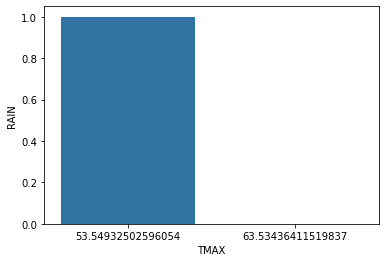

In [33]:
sns.barplot(x = 'TMAX', y ='RAIN', data = rainvstmax)

**Below are various plots for Numeric feature distribution to get different view point for better data understanding**

<Figure size 3600x1800 with 0 Axes>

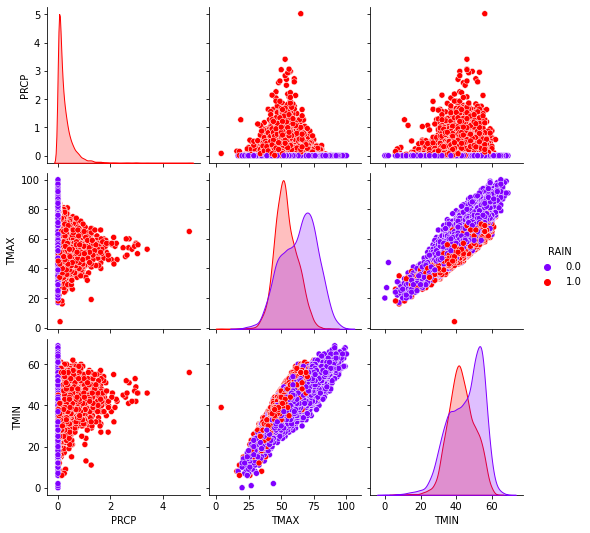

In [34]:
plt.figure(figsize=(50,25))
sns.pairplot(weather_master_data[['PRCP', 'TMAX', 'TMIN', 'RAIN']],palette='rainbow',diag_kind='kde',hue="RAIN")

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

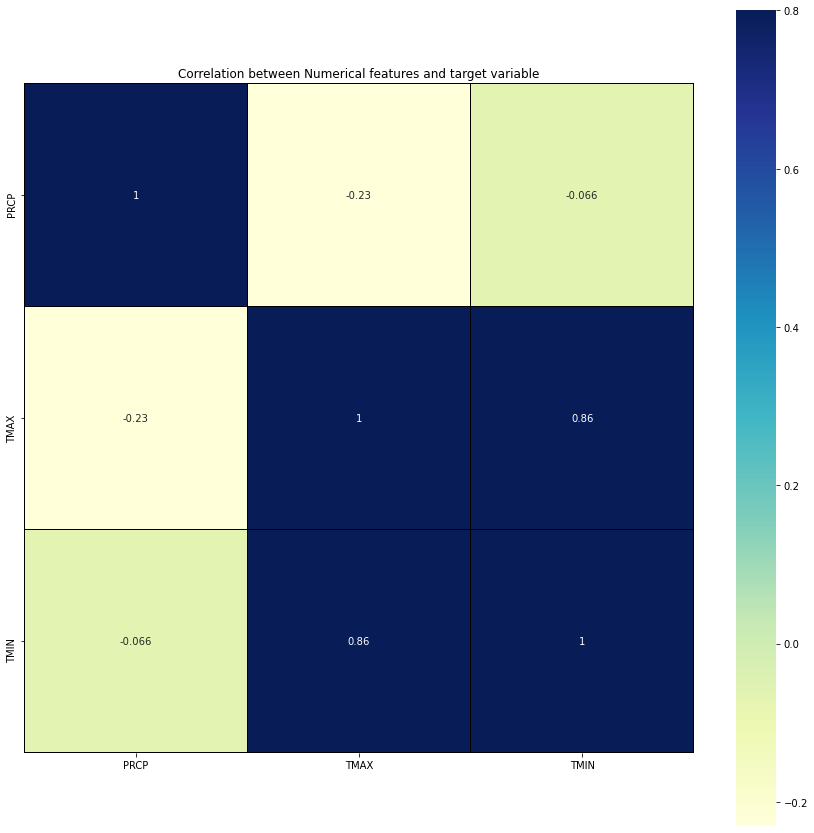

In [35]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = weather_master_data.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features and target variable')

**Observations:**

- There is strong positive correlation for **TMAX** with **TMIN**

In [36]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
weather_master_data.cov()

,PRCP,TMAX,TMIN
PRCP,0.055491,-0.688304,-0.136314
TMAX,-0.688304,161.299221,95.978739
TMIN,-0.136314,95.978739,78.016529


<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [37]:
weather_master_data.dropna(inplace=True)

In [38]:
y_encoded = pd.get_dummies(weather_master_data, columns=['RAIN'], drop_first=True)

In [39]:
y_encoded.head()

,DATE,PRCP,TMAX,TMIN,RAIN_True
Id,,,,,
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [40]:
weather_master_data['RAIN'].value_counts()

False    11771
True      8667
Name: RAIN, dtype: int64

In [41]:
y_encoded['RAIN_True'].value_counts()

0    11771
1     8667
Name: RAIN_True, dtype: int64

In [42]:
weather_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20438 entries, 0 to 20439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    20438 non-null  datetime64[ns]
 1   PRCP    20438 non-null  float64       
 2   TMAX    20438 non-null  int64         
 3   TMIN    20438 non-null  int64         
 4   RAIN    20438 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 958.0+ KB


In [43]:
y = y_encoded['RAIN_True']
weather_master_data.drop(labels=['RAIN'], axis=1, inplace=True)
y.head()

Id
0    1
1    1
2    1
3    1
4    1
Name: RAIN_True, dtype: uint8

In [44]:
weather_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20438 entries, 0 to 20439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    20438 non-null  datetime64[ns]
 1   PRCP    20438 non-null  float64       
 2   TMAX    20438 non-null  int64         
 3   TMIN    20438 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 798.4 KB


In [45]:
#weather_master_data['PRCP'].fillna(weather_master_data['PRCP'].mean(), inplace=True)

In [46]:
weather_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20438 entries, 0 to 20439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    20438 non-null  datetime64[ns]
 1   PRCP    20438 non-null  float64       
 2   TMAX    20438 non-null  int64         
 3   TMIN    20438 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 798.4 KB


In [47]:
weather_master_data.drop(labels=['DATE'], axis=1, inplace=True)

In [48]:
weather_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20438 entries, 0 to 20439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    20438 non-null  float64
 1   TMAX    20438 non-null  int64  
 2   TMIN    20438 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 638.7 KB


In [49]:
weather_master_data.head()

,PRCP,TMAX,TMIN
Id,,,
0,0.47,51,42
1,0.59,45,36
2,0.42,45,35
3,0.31,45,34
4,0.17,45,32


In [50]:
weather_test_data.drop(labels=['DATE'], axis=1, inplace=True)

In [51]:
weather_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 20440 to 25550
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    5110 non-null   float64
 1   TMAX    5110 non-null   int64  
 2   TMIN    5110 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 159.7 KB


In [52]:
weather_test_data.head()

,PRCP,TMAX,TMIN
Id,,,
20440,0.00,54,37
20441,0.14,51,38
20442,0.13,48,44
20443,0.01,51,38
20444,0.00,53,35


<a name = Section72></a>
### **7.2 Data Preparation and Scaling**

- Considering we are using KNN Algorithm and feature are not in same unit we need to apply scaling. Will use Pipeline for the same.

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(weather_master_data, y, test_size=0.25,random_state=10)
pipe = Pipeline((
("sc",StandardScaler()),    
("knn",KNeighborsClassifier(n_neighbors=7)) ,    
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipe, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
0.9575342465753425
Training Accuracy
0.9633350730688935

Average Accuracy
0.9547879207478978


In [54]:
test_pred = pipe.predict(weather_test_data)

<a name = Section73></a>
### **7.3 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [55]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(weather_master_data, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (15328, 3)
y_train shape:  (15328,)
X_test shape:  (5110, 3)
y_test shape:  (5110,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15328 entries, 6517 to 9977
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    15328 non-null  float64
 1   TMAX    15328 non-null  int64  
 2   TMIN    15328 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 479.0 KB


,PRCP,TMAX,TMIN
Id,,,
6517,0.51,54,48
1831,0.00,47,31
7776,0.06,57,43
3998,0.00,49,39
15236,0.00,70,48


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV    
pipe = Pipeline(steps=[("scale", StandardScaler()),
                       ("transform", PowerTransformer()),
("knn", KNeighborsClassifier(n_jobs=-1))])

param_grid = {
    'knn__n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

search = GridSearchCV(pipe,param_grid,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('transform', PowerTransformer()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [57]:
search.best_params_

{'knn__n_neighbors': 1}

In [58]:
search.best_score_

0.9991518618248831

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a KNN Classification model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

In [59]:
knn_pipe = Pipeline(steps=[("scale", StandardScaler()),
                       ("transform", PowerTransformer()),
("knn", KNeighborsClassifier(n_neighbors=3,n_jobs=-1))])

knn_pipe.fit(X_train, y_train)
cv_score= cross_val_score(knn_pipe, X_train, y_train, cv=10, scoring='accuracy')
print(cv_score)
print("Average Accuracy")
print(np.mean(cv_score))

[0.99934768 1.         0.99739074 0.99934768 0.99739074 0.99934768
 0.99934768 0.99739074 0.99869452 0.99869452]
Average Accuracy
0.9986951982409616


In [60]:
test_pred2 = knn_pipe.predict(weather_test_data)

In [61]:
output = pd.DataFrame({'Id': weather_test_data.index,'RAIN_True': test_pred})
output.to_csv('seattle-weather-prediction-submission1.csv', index=False, header=False)

In [62]:
output = pd.DataFrame({'Id': weather_test_data.index,'RAIN_True': test_pred2})
output.to_csv('seattle-weather-prediction-submission2.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- KNN Classification Model was used for prediction considering this is ML Advanced project.
- Accuracy Score was used to arrive at model evaluation which is required for this ML Advanced Project.